In [1]:
import pandas as pd
import re
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import spacy
from pprint import pprint
from nltk.stem.snowball import SnowballStemmer

In [2]:
df_file = pd.read_csv('cleaning_contenido2.csv')
##df_file = pd.read_csv('base_total.csv',sep='|')

In [3]:
#LIMPIEZA
df_corpus= df_file[['contenido']].copy()
df_corpus=df_corpus[1:]
df_corpus=df_corpus.dropna()
df_corpus['contenido'] = df_corpus['contenido'].map(lambda x: re.sub('\s+', ' ', x))
df_corpus['contenido'] = df_corpus['contenido'].map(lambda x: re.sub('[_,";¿*&()=:+#\|@.!?]', ' ', x))
df_corpus['contenido'] = df_corpus['contenido'].map(lambda x: x.lower())
palabras_cortas = re.compile(r'\W*\b\w{1,3}\b')
df_corpus['contenido'] = df_corpus['contenido'].map(lambda x: palabras_cortas.sub('', x))

df_corpus.head()


,contenido
1,coronavirus este lunes abril ministro salud j...
2,ministerio salud minsal informó mañana este l...
3,coronavirus como resultado acuerdos mesa soci...
4,casos coronavirus chile confirmados total 6927...
5,casos covid chile tiene nexo trazable encuent...


In [4]:
#Tokenizacion
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

In [5]:
datos= df_corpus.values.tolist()
datos_palabras= list(sent_to_words(datos))
print(datos_palabras[:1])

[['coronavirus', 'este', 'lunes', 'abril', 'ministro', 'salud', 'jaime', 'manalich', 'entrego', 'nuevo', 'informe', 'sobre', 'casos', 'coronavirus', 'chile', 'cifras', 'actualizadas', 'hasta', 'horas', 'domingo', 'abril', 'pandemia', 'sigue', 'avanzando', 'pais', 'paso', 'acelerado', 'minsal', 'reporto', 'nuevos', 'casos', 'ultimas', 'horas', 'eleva', 'total', 'contagiados', 'covid', 'casos', 'totales', 'ellas', 'pacientes', 'hospitalizados', 'personas', 'estado', 'critica', 'cifra', 'fallecidos', 'tambien', 'aumento', 'ultimas', 'horas', 'reporte', 'nuevas', 'victimas', 'fatales', 'region', 'metropolitana', 'otra', 'magallanes', 'ambos', 'numero', 'fallecidos', 'elevo', 'hasta', 'total', 'region', 'metropolitana', 'tuvo', 'otra', 'dura', 'jornada', 'casos', 'nuevos', 'otro', 'fallecido', 'llegando', 'casos', 'totales', 'atras', 'zona', 'muestra', 'panorama', 'preocupante', 'araucania', 'segunda', 'region', 'contagios', 'seguido', 'nuble', 'biobio', 'cifra', 'total', 'muertos', 'corona

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
newStopWords = ['coronavirus','chile','casos','detalles','agrego','embargo','forma','semanas','fecha','francia','espana','cada','agregó','parte','caso','dias','respecto','momento','covid','ascom','tikitakas','personas','tipo','tenía','jorge','habrá','habra','medios','perú','casa','cuales',
                'marzo','abril','lunes','semana','despues','hora','también','tambien','martes','radio','lugar','lugares','anuncio','anunciar',
                'miércoles','jueves','viernes','sábado','domingo','enero','comentarios','reservamos','febrero','italia','según','segun','horas','aquí','virus','veces','radio','eliodoro', 'yanez', 'providencia',
                 'reservamos','derecho','bloquear','usuarios','agresivos','commons','noticias','indique','contrario','eliminar','comentarios','debate','espacio','wordpress','desarrollado','detallo','estime','conveniente','manteniendo',]
stop_words.extend(newStopWords)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmerc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
def to_array(texts):
    arreglo_v=[]
    for docv in range(len(texts)):
        for wordv in data_lemmatized[docv].split():
            if wordv is None:
                pass
            else:
                arreglo_v.append(wordv)
    return arreglo_v
def lemma_sustantivos(texts):
    text_out = []
    for sent in texts:
        doc = nlp1(" ".join(sent)) 
        text_out.append(" ".join([token.text for token in doc.noun_chunks])) 
    return text_out
        
        

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(datos_palabras,min_count=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[datos_palabras],min_count=5)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words_nostops = remove_stopwords(datos_palabras)
data_words_Xgrams = make_trigrams(data_words_nostops)






In [9]:
nlp1 = spacy.load("es_core_news_sm")
data_lemmatized =  lemma_sustantivos(data_words_Xgrams)


print(data_lemmatized[:1])

['ministro_salud_jaime_manalich entrego informe cifras pandemia pais paso ultimas contagiados cifra aumento reporte victimas magallanes elevo jornada atras zona panorama region contagios biobio muertos ascendio magallanes adultos_mayores']


In [10]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from pprint import pprint
spanish_stopwords = stopwords.words('spanish')
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
vectorizer = CountVectorizer(data_lemmatized,min_df=0.1,max_df=0.9,max_features=30)
data_vectorized = vectorizer.fit_transform(data_lemmatized)
data_vectorized.shape



(79, 30)

In [12]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

print(vectorizer.vocabulary_)

Sparsicity:  35.27426160337553 %
{'pandemia': 19, 'pais': 18, 'region': 22, 'contagios': 5, 'ministerio_salud': 14, 'pacientes': 17, 'santiago': 26, 'gobierno': 9, 'bono': 1, 'muertes': 15, 'salud': 25, 'medida': 11, 'medidas': 12, 'autoridades': 0, 'cuarentena': 7, 'cantidad': 3, 'mundo': 16, 'enfermedad': 8, 'presidente': 21, 'informo': 10, 'contagio': 4, 'riesgo': 24, 'todas': 27, 'persona': 20, 'brote': 2, 'regiones': 23, 'trabajadores': 28, 'millones': 13, 'crisis': 6, 'trabajo': 29}


In [13]:
## Build LDA Model
lda_model = LatentDirichletAllocation(n_topics=15,               # Number of topics
                                      max_iter=100,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=30,          # Random state
                                      batch_size=50,            # n docs in each learning iter
                                      evaluate_every = 1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = 1, 
                                      learning_decay=0.3,
                                      # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=50, doc_topic_prior=None,
             evaluate_every=1, learning_decay=0.3,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=15, perp_tol=0.1,
             random_state=30, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [14]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())


Log Likelihood:  -7971.718051450654
Perplexity:  30.70045617212809
{'batch_size': 50,
 'doc_topic_prior': None,
 'evaluate_every': 1,
 'learning_decay': 0.3,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 100,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': 1,
 'n_topics': 15,
 'perp_tol': 0.1,
 'random_state': 30,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [15]:
# Define Search Param
search_params = {'n_topics': [3,4,5,6,7,8,9,10,15,20,30], 'learning_decay': [.1,.3,.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation()
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)







C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\li

C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: Deprecat

C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: Deprecat

C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: Deprecat

C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\ProgramData\Anaconda3\envs\simple\lib\site-packages\sklearn\decomposition\online_lda.py:314: Deprecat

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_topics': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30], 'learning_decay': [0.1, 0.3, 0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.1, 'n_topics': 3}
Best Log Likelihood Score:  -2758.8895911539234
Model Perplexity:  28.046359754451316


In [17]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(datos))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,dominant_topic
Doc0,0.300000,0.080000,0.620000,2
Doc1,0.100000,0.080000,0.810000,2
Doc2,0.090000,0.330000,0.590000,2
Doc3,0.070000,0.080000,0.860000,2
Doc4,0.590000,0.070000,0.340000,0
Doc5,0.450000,0.010000,0.540000,2
Doc6,0.010000,0.260000,0.730000,2
Doc7,0.050000,0.050000,0.900000,2
Doc8,0.000000,0.420000,0.580000,2
Doc9,0.020000,0.970000,0.020000,1


In [18]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,41
1,1,24
2,0,14


In [19]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
1      -632.045471 -384.325073       1        1  48.444158
2     -1209.665405  212.164124       2        1  42.757714
0     -1437.453247 -586.322510       3        1   8.798128, topic_info=          Term        Freq       Total Category  logprob  loglift
4     contagio   77.000000   77.000000  Default  30.0000  30.0000
18        pais  142.000000  142.000000  Default  29.0000  29.0000
20     persona   62.000000   62.000000  Default  28.0000  28.0000
6       crisis  139.000000  139.000000  Default  27.0000  27.0000
12     medidas  177.000000  177.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
1         bono    0.367726   59.420556   Topic3  -6.3226  -2.6544
29     trabajo    0.369324   60.103474   Topic3  -6.3182  -2.6615
8   enfermedad    0.429411   85.328519   Topic3  -6.1675  -2.8612
6       crisis    0.363757  139.617623   Topic3  -6.3334  -3.5195
9     gobierno    0.430050  177.273089   Topic3  -6.1660  -3.5909

[120 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         1  0.554185   autoridades
0         2  0.429046   autoridades
1         1  0.824630          bono
1         2  0.168292          bono
2         1  0.104419         brote
...     ...       ...           ...
27        3  0.164841         todas
28        1  0.948086  trabajadores
28        2  0.020172  trabajadores
28        3  0.040344  trabajadores
29        1  0.981640       trabajo

[76 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [20]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,autoridades,bono,brote,cantidad,contagio,contagios,crisis,cuarentena,enfermedad,gobierno,...,persona,presidente,region,regiones,riesgo,salud,santiago,todas,trabajadores,trabajo
Topic0,0.349834,0.351488,3.236311,0.34536,36.486864,12.623364,0.347694,11.633686,0.410449,0.411060,...,23.287287,0.349475,1.586136,0.344647,3.575066,17.590230,0.346862,8.513422,1.757375,0.353015
Topic1,32.437982,50.243515,5.020434,1.10519,17.699348,9.407986,140.759540,50.358760,16.025420,149.318812,...,11.250096,55.376655,9.129314,3.036577,12.004616,82.116595,21.913001,23.477802,48.246102,61.294365
Topic2,24.212183,10.404997,39.743255,37.54945,21.813788,34.968651,2.892766,66.007554,69.564131,32.270129,...,27.462617,3.273870,55.284551,38.618777,24.420318,22.293175,24.740137,23.008776,0.996523,0.352620


In [21]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,contagio,pais,persona,medidas,salud,contagios,cuarentena,ministerio_salud,todas,pandemia,informo,riesgo,brote,medida,trabajadores
Topic 1,gobierno,crisis,medidas,pandemia,salud,pais,trabajo,presidente,cuarentena,bono,trabajadores,mundo,autoridades,medida,todas
Topic 2,enfermedad,ministerio_salud,cuarentena,medidas,region,pacientes,millones,informo,pais,muertes,brote,regiones,pandemia,cantidad,contagios


In [22]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=50).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))



Component's weights: 
 [[ 0.21  0.53  0.82]
 [-0.02  0.84 -0.54]]
Perc of Variance Explained: 
 [0.08 0.57]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

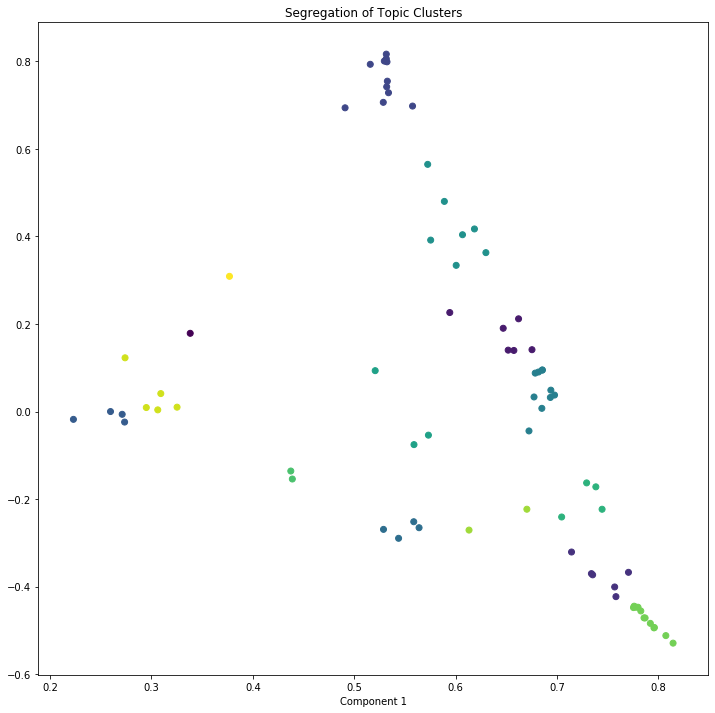

In [23]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [24]:
dataset = [d.split() for d in data_lemmatized]
id2word = corpora.Dictionary(dataset)
# Create Corpus
texts = dataset
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]]


In [25]:
lda_modelg = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=100,
                                       chunksize=50,
                                       passes=30,
                                       per_word_topics=True)

In [26]:
pprint(lda_modelg.print_topics())
doc_lda = lda_modelg[corpus]

[(0,
  '0.017*"pandemia" + 0.015*"pais" + 0.014*"crisis" + 0.010*"octubre" + '
  '0.010*"trabajo" + 0.010*"mundo" + 0.009*"mensaje" + 0.009*"amenaza" + '
  '0.009*"empresas" + 0.007*"emprendedores"'),
 (1,
  '0.017*"adultos_mayores" + 0.013*"medidas" + 0.010*"enfermedad" + '
  '0.010*"todas" + 0.009*"pais" + 0.009*"muertos" + 0.008*"salud" + '
  '0.008*"pandemia" + 0.006*"balance" + 0.006*"cuarentena"'),
 (2,
  '0.010*"gobierno" + 0.010*"bono" + 0.009*"crisis" + 0.009*"jaime_manalich" + '
  '0.009*"pais" + 0.008*"mundo" + 0.008*"pandemia" + 0.008*"medidas" + '
  '0.008*"cuarentena" + 0.007*"manalich"'),
 (3,
  '0.014*"isla" + 0.011*"gobierno" + 0.010*"salud" + 0.010*"medidas" + '
  '0.009*"mundo" + 0.009*"pandemia" + 0.009*"alcalde" + 0.008*"cuarentena" + '
  '0.008*"crisis" + 0.008*"general_ejercito"'),
 (4,
  '0.017*"gobierno" + 0.013*"cuarentena" + 0.013*"ministerio_salud" + '
  '0.012*"medidas" + 0.011*"pais" + 0.009*"presidente" + 0.008*"contagios" + '
  '0.008*"contagio" + 0.006*

In [27]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_modelg, texts=dataset, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.28753114235473654


In [28]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=50,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=dataset, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [29]:
import tqdm

min_topics = 3
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
alpha = 0.5 
beta = 0.01
num_of_docs = len(corpus)
model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
my_df = []

for k in topics_range:
          
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k, a=alpha, b=beta)

    d = {
        'Topicos': k,
        'Alpha': alpha,
        'Beta': beta,
        'Coherence': cv
    }
    my_df.append(d)
    print(d)
            
pd.DataFrame( my_df).to_csv('lda_tuning_results.csv', index=False)

{'Topicos': 3, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2582680356331679}
{'Topicos': 4, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2753331351233526}
{'Topicos': 5, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.27775879920290614}
{'Topicos': 6, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2797243088069414}
{'Topicos': 7, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.304911366515392}
{'Topicos': 8, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2888817686770263}
{'Topicos': 9, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.28463034695155787}
{'Topicos': 10, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.299540302127987}
{'Topicos': 11, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.30355055793916336}
{'Topicos': 12, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2969804264064632}
{'Topicos': 13, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.29045603207899406}
{'Topicos': 14, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.3150133851212961}
{'Topicos': 15, 'Alpha': 0.5, 'Beta': 0.01, 'Coherence': 0.2942723821786623}
{'To